In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

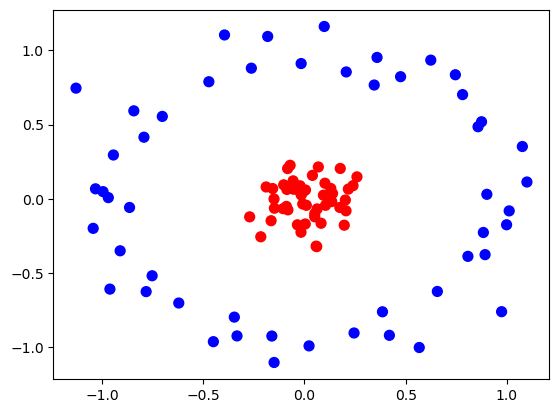

In [26]:
from sklearn.datasets._samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [27]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [28]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [30]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11872\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


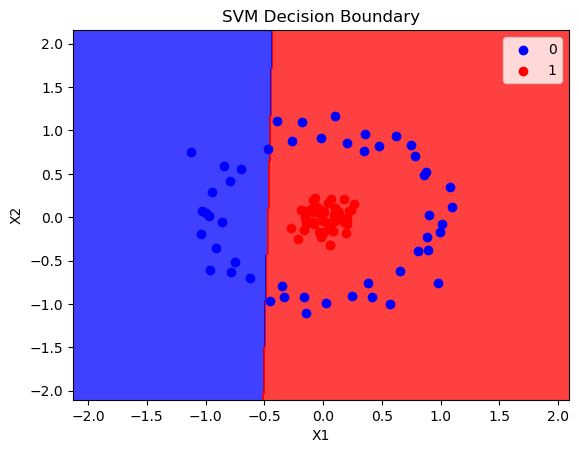

In [31]:
plot_decision_boundary(X, y, classifier)

In [32]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

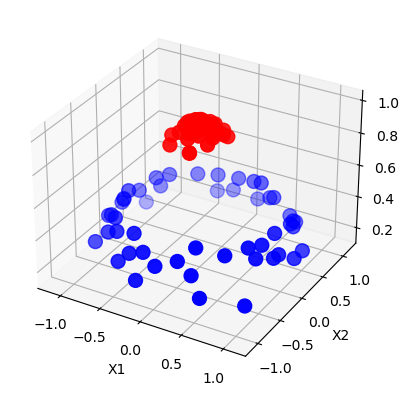

In [33]:
plot_3d_plot(X,y)

In [34]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\HP\AppData\Local\Temp\ipykernel_11872\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


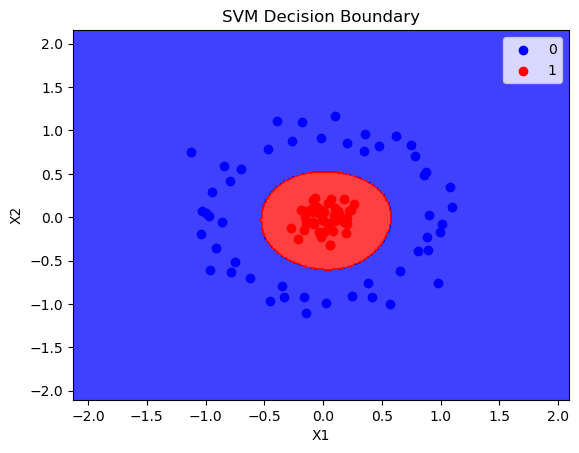

In [36]:
plot_decision_boundary(X, y, rbf_classifier)

In [43]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\HP\AppData\Local\Temp\ipykernel_11872\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


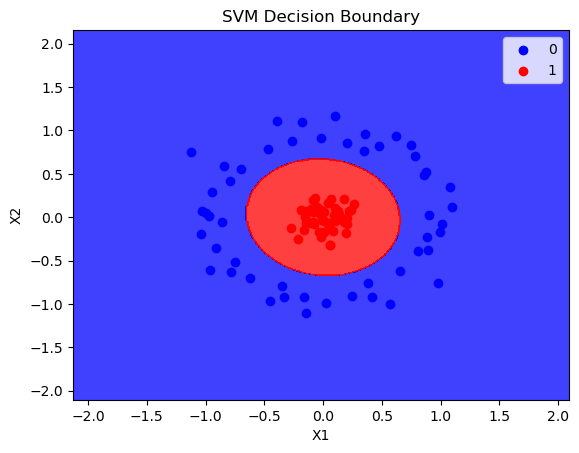

In [45]:
plot_decision_boundary(X, y, poly_classifier)

In [46]:
#original X
X

array([[ 4.74558139e-01,  8.23299981e-01],
       [ 1.07586568e+00,  3.52448471e-01],
       [-3.46288606e-01, -7.98152774e-01],
       [ 2.26920924e-02, -9.92192356e-01],
       [ 2.39679500e-01,  8.84099758e-02],
       [-1.70898031e-02, -2.25814629e-01],
       [ 9.73391269e-01, -7.61508722e-01],
       [ 3.58370242e-01,  9.53248195e-01],
       [ 8.83300209e-01, -2.27316720e-01],
       [-2.70548152e-01, -1.21920404e-01],
       [ 3.44420769e-01,  7.67148913e-01],
       [-2.62297703e-01,  8.80623943e-01],
       [-1.49952106e-01, -1.10405323e+00],
       [ 4.94740275e-03,  5.90006599e-02],
       [ 5.08050848e-02, -1.00254124e-01],
       [ 4.19381056e-01, -9.20871301e-01],
       [ 2.16697783e-01,  6.54053707e-02],
       [-7.52211554e-01, -5.19130350e-01],
       [ 6.84741915e-02,  2.14592379e-01],
       [-1.64274421e-02,  9.11956715e-01],
       [ 2.01884856e-01, -8.32311926e-03],
       [ 2.06245767e-01,  8.55304304e-01],
       [-7.65519046e-03,  4.55073508e-02],
       [-1.

In [47]:
## For each x,y coorinate we calculate below exp
np.exp(-(X**2))

array([[0.7983522 , 0.50772117],
       [0.31427497, 0.88318559],
       [0.88699512, 0.52885137],
       [0.9994852 , 0.37364629],
       [0.94417263, 0.99221414],
       [0.99970798, 0.95028604],
       [0.38771274, 0.55995686],
       [0.8794758 , 0.40305505],
       [0.45830551, 0.94963945],
       [0.92941836, 0.98524535],
       [0.8881402 , 0.55514971],
       [0.93351328, 0.46047416],
       [0.97776528, 0.29554519],
       [0.99997552, 0.99652497],
       [0.99742217, 0.98999945],
       [0.83871823, 0.42826892],
       [0.95412754, 0.99573127],
       [0.56789302, 0.76376409],
       [0.99532226, 0.95499432],
       [0.99973018, 0.43532385],
       [0.96006192, 0.99993073],
       [0.9583547 , 0.4811648 ],
       [0.9999414 , 0.99793122],
       [0.96758709, 0.30169829],
       [0.97766579, 0.99999875],
       [0.4514058 , 0.86763782],
       [0.99952214, 0.99236309],
       [0.97323789, 0.97835383],
       [0.99247973, 0.99605512],
       [0.4106372 , 0.91650938],
       [0.

In [48]:
## This will sum up the x,y coordinate calculated value..and thus we get 100 values as our z axis
np.exp(-(X**2)).sum(1)

array([1.30607337, 1.19746056, 1.41584649, 1.37313149, 1.93638677,
       1.94999402, 0.9476696 , 1.28253085, 1.40794496, 1.91466371,
       1.44328991, 1.39398745, 1.27331047, 1.9965005 , 1.98742162,
       1.26698715, 1.94985881, 1.33165711, 1.95031658, 1.43505402,
       1.95999265, 1.4395195 , 1.99787262, 1.26928538, 1.97766454,
       1.31904362, 1.99188524, 1.95159171, 1.98853485, 1.32714658,
       1.08730704, 1.3532867 , 1.97386152, 1.98455039, 1.15407856,
       1.09491414, 1.98730755, 1.98777614, 1.98272717, 1.32677339,
       1.9282878 , 1.19516852, 1.3751955 , 1.9990754 , 1.33648454,
       1.98528301, 1.97093959, 0.85333174, 1.98486774, 1.21837274,
       1.95849503, 1.2865113 , 1.98073891, 1.21184099, 1.97841507,
       1.98236968, 1.15069071, 1.95246597, 1.96842413, 1.09082226,
       1.99146179, 1.31999214, 1.91343819, 1.99280821, 1.95223436,
       1.98940499, 1.26947039, 1.94523956, 1.42147197, 1.93089972,
       1.29772179, 1.89748079, 1.96642443, 1.99870267, 1.97968

In [49]:
X_new=np.exp(-(X**2))

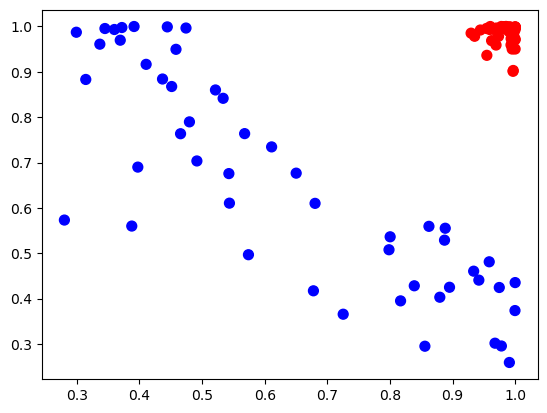

In [50]:
## Scatter plot of rbf X,Y
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')